<a href="https://colab.research.google.com/github/cibelerusso/AnaliseMultivariadaEAprendizadoNaoSupervisionado/blob/master/Comandos%20em%20Python/7%20ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Multivariada e Aprendizado Não-Supervisionado

por Cibele Russo.

ICMC USP São Carlos.

## Aula 7b: Análise de Componentes Principais

### Exemplo: Decatlo



Uma base de dados com 41 linhas e 13 colunas: as dez primeiras colunas correspondem ao desempenho dos atletas para as 10 provas do decatlo. As colunas 11 e 12 correspondem respectivamente à classificação e aos pontos obtidos. A última coluna é uma variável categórica correspondente ao evento esportivo (Jogos Olímpicos de 2004 ou Decastar de 2004)

As variáveis são

- 100m (100 metros rasos),
- long.jump (salto em distância),
- shot.put (arremesso de peso),
- High.jump (salto em altura),
- 400m (400 metros rasos),
- 110m.hurdle (110 metros com barreiras),
- Discus (lançamento de disco),
- Pole.vault (salto com vara),
- Javeline (lançamento de dardo),
- 1500m (1500 metros).

Fonte: https://malouche.github.io/data_in_class/decathlon_data.html

Em R, os dados estão disponíveis em:


library(FactoMineR)

data(decathlon)


1. Analise a matriz de correlações dos dados.
2. Decomponha a matriz de variâncias e covariâncias em componentes principais.
3. Quantas componentes explicam ao menos 90% da variabilidade dos dados?
4. Proponha uma ordenação dos atletas segundo a primeira componente principal.

<img src="https://sites.google.com/site/educopediaedfisica/_/rsrc/1286920940486/atletismo/decatlo-e-pentatlo/decatlo.png" width=500 />

Fonte: https://sites.google.com/site/educopediaedfisica/atletismo/decatlo-e-pentatlo

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

caminho = 'https://raw.githubusercontent.com/cibelerusso/AnaliseMultivariadaEAprendizadoNaoSupervisionado/master/Dados/decathlon.csv'
df = pd.read_csv(caminho, index_col=0)
df.head(30)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,6,8030,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar
HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,10,7733,Decastar


In [25]:
# 1. Analise a matriz de correlações dos dados.

# Cálculo da matriz de correlações
corr = df.iloc[:,0:9].corr()
corr

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline
100m,1.000000,-0.598678,-0.356482,-0.246253,0.520298,0.579889,-0.221708,-0.082537,-0.157746
Long.jump,-0.598678,1.000000,0.183304,0.294644,-0.602063,-0.505410,0.194310,0.204014,0.119759
Shot.put,-0.356482,0.183304,1.000000,0.489212,-0.138433,-0.251616,0.615768,0.061182,0.374956
High.jump,-0.246253,0.294644,0.489212,1.000000,-0.187957,-0.283289,0.369218,-0.156181,0.171880
400m,0.520298,-0.602063,-0.138433,-0.187957,1.000000,0.547988,-0.117879,-0.079292,0.004232
110m.hurdle,0.579889,-0.505410,-0.251616,-0.283289,0.547988,1.000000,-0.326201,-0.002704,0.008743
Discus,-0.221708,0.194310,0.615768,0.369218,-0.117879,-0.326201,1.000000,-0.150072,0.157890
Pole.vault,-0.082537,0.204014,0.061182,-0.156181,-0.079292,-0.002704,-0.150072,1.000000,-0.030001
Javeline,-0.157746,0.119759,0.374956,0.171880,0.004232,0.008743,0.157890,-0.030001,1.000000


<Axes: >

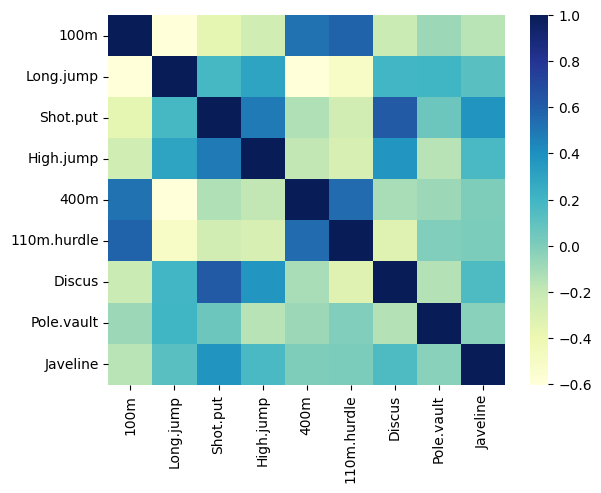

In [26]:
# Mapa de calor das correlações

sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

In [27]:
# Análise de Componentes Principais
# 2. Decomponha a matriz de variâncias e covariâncias em componentes principais.


X = np.matrix(df.iloc[:,0:10])
S = np.cov(np.transpose(X))


In [28]:
X = np.asarray(X)

In [29]:
# variâncias

np.diagonal(S)

array([6.91810976e-02, 1.00110000e-01, 6.79681220e-01, 7.91219512e-03,
       1.33044878e+00, 2.22584878e-01, 1.14098352e+01, 7.72839024e-02,
       2.32981930e+01, 1.36264701e+02])

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)


In [31]:
pca

PCA(n_components=8)

In [32]:
pca.fit(X)

PCA(n_components=8)

In [33]:
# Pesos das componentes principais

pca.components_[0,:]

array([-1.28080400e-03, -9.50593693e-04,  8.04474909e-03, -3.21942507e-04,
        3.95670085e-02,  1.26099822e-03,  7.79032346e-02,  5.70956842e-03,
       -8.59485398e-02,  9.92409609e-01])

In [34]:
# 3. Quantas componentes explicam ao menos 90% da variabilidade dos dados?

# Variância das componentes principais

pca.explained_variance_ratio_

np.round(pca.explained_variance_ratio_,2)


array([0.8 , 0.14, 0.06, 0.01, 0.  , 0.  , 0.  , 0.  ])

In [35]:
pca.explained_variance_ratio_.cumsum()

array([0.7965959 , 0.93212546, 0.98972346, 0.99632525, 0.99838027,
       0.99916431, 0.99953119, 0.99982301])

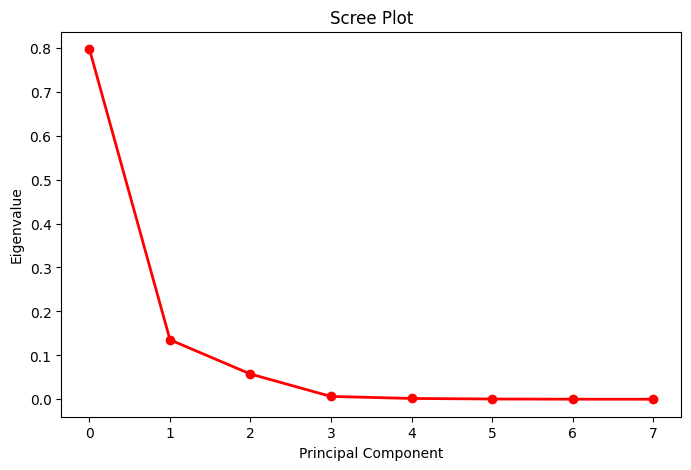

In [36]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

In [37]:
pca.transform(X)

array([[ 1.21268985e+01,  5.31924548e+00, -3.01158938e+00,
        -7.44026954e-01, -8.96719233e-02, -1.21968812e-01,
        -1.52491697e-01,  7.16547329e-02],
       [ 2.26340062e+01,  4.81860306e+00,  3.47084930e+00,
        -7.29689068e-01,  1.31226354e+00,  1.34852950e-01,
        -6.36022691e-02, -2.06026791e-01],
       [ 2.20160089e+01, -5.12656310e+00,  4.72748179e+00,
        -1.50142432e+00,  1.81608063e-01, -2.13267912e-01,
         1.52025024e-01, -3.16580199e-01],
       [ 3.89697006e-01,  3.37695640e+00, -4.53039879e+00,
        -1.18018344e+00,  6.71183270e-02, -5.58886494e-01,
        -2.03180156e-01, -2.81748533e-01],
       [-2.85674567e+00,  5.32450428e+00,  6.44553700e-01,
         1.16432891e+00, -2.91117455e-01, -5.41053503e-01,
        -2.99831098e-02,  1.37781408e-02],
       [-6.44908091e-01, -7.20789283e+00, -1.09038567e+00,
        -1.18096569e+00, -4.75718818e-01,  1.64086135e-01,
        -1.11370572e-01,  1.75269582e-02],
       [-1.06333738e+01, -3.227161

In [38]:
# Vamos considerar 2 componentes principais

pca = PCA(n_components=2)
pca.fit(X)

pca.components_



array([[-1.28080400e-03, -9.50593693e-04,  8.04474909e-03,
        -3.21942507e-04,  3.95670085e-02,  1.26099822e-03,
         7.79032346e-02,  5.70956842e-03, -8.59485398e-02,
         9.92409609e-01],
       [-1.11646237e-02,  9.65383661e-03,  8.56736836e-02,
         4.28001111e-03,  9.81124318e-03, -4.91153939e-03,
         2.67357273e-01, -1.11678946e-03,  9.57662014e-01,
         6.08751215e-02]])

In [39]:
np.round(pca.components_[0],3)

array([-0.001, -0.001,  0.008, -0.   ,  0.04 ,  0.001,  0.078,  0.006,
       -0.086,  0.992])

In [40]:
PCA1 = pca.transform(X)[:,0]
PCA2 = pca.transform(X)[:,1]

In [41]:
df['PCA1'] = PCA1
df['PCA2'] = PCA2


In [42]:
df.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar,12.126899,5.319245
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar,22.634006,4.818603
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar,22.016009,-5.126563
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar,0.389697,3.376956
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar,-2.856746,5.324504


In [43]:
# 4. Proponha uma ordenação dos atletas segundo a primeira componente principal.

In [44]:
df.sort_values(by='PCA1',ascending=False)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
Korkizoglou,10.86,7.07,14.81,1.94,51.16,14.96,46.07,4.70,53.05,317.00,26,7573,OlympicG,38.339641,-2.223945
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar,22.634006,4.818603
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar,22.016009,-5.126563
Casarsa,11.36,6.68,14.92,1.94,53.20,15.39,48.66,4.40,58.62,296.12,28,7404,OlympicG,17.421325,2.549930
BOURGUIGNON,11.36,6.80,13.46,1.86,51.16,15.67,40.49,5.02,54.68,291.70,13,7313,Decastar,12.648385,-3.822986
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar,12.126899,5.319245
Terek,10.92,6.94,15.15,1.94,49.56,15.12,45.62,5.30,50.62,290.36,21,7893,OlympicG,12.018749,-6.283038
Turi,11.08,6.91,13.62,2.03,51.67,14.26,39.83,4.80,59.34,290.01,23,7708,OlympicG,10.537908,0.391183
Pogorelov,10.95,7.31,15.10,2.06,50.79,14.21,44.60,5.00,53.45,287.63,11,8084,OlympicG,9.031751,-3.995408
HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,10,7733,Decastar,6.235938,-0.526676


## Exercício: Refazer a análise com a matriz de correlações e comparar os resultados

### Exemplo: Substâncias

Estudos mostram que grande parte de adultos e adolescentes norte-americanos usam regularmente substâncias psicoativas. Em um destes estudos (Huba et al. 1981, J. of Personality and Social Psychology), dados foram coletados de 1634 estudantes na área
metropolitana de Los Angeles. Cada participante completou um questionário informando o número de vezes que cada item foi usado.  Os itens são os seguintes: cigarro, cerveja, vinho, licor, cocaína, tranquilizantes, medicamentos, heroína, maconha, haxixe, inalantes, alucinógenos e anfetaminas.


As respostas foram registradas em uma escala de cinco pontos: 1. nunca experimentei, 2. apenas uma vez, 3. poucas vezes, 4. muitas vezes e 5. regularmente.

A matriz de correlações das respostas encontra-se no arquivo Substancias.txt.


Foram obtidas as componentes principais a matriz de correlações dos dados. Como propor um 'índice de utilização de substâncias psicoativas'?


In [45]:
# Uma opção para a leitura dos dados

textfile = open("Substancias.txt")

R = []

for line in textfile:
    row_R = line.strip("\n").split()
    for i, item in enumerate(row_R):
        try:
            row_R[i] = float(item)
        except ValueError:
            pass
    R.append(row_R)

textfile.close()

In [46]:
R

[[1.0,
  0.447,
  0.422,
  0.435,
  0.114,
  0.203,
  0.091,
  0.082,
  0.513,
  0.304,
  0.245,
  0.101,
  0.245],
 [0.447,
  1.0,
  0.619,
  0.604,
  0.068,
  0.146,
  0.103,
  0.063,
  0.445,
  0.318,
  0.203,
  0.088,
  0.199],
 [0.422,
  0.619,
  1.0,
  0.583,
  0.054,
  0.139,
  0.11,
  0.066,
  0.365,
  0.249,
  0.183,
  0.074,
  0.184],
 [0.435,
  0.604,
  0.583,
  1.0,
  0.115,
  0.258,
  0.122,
  0.097,
  0.482,
  0.368,
  0.255,
  0.139,
  0.293],
 [0.114,
  0.068,
  0.054,
  0.115,
  1.0,
  0.349,
  0.209,
  0.321,
  0.186,
  0.303,
  0.272,
  0.279,
  0.278],
 [0.203,
  0.146,
  0.139,
  0.258,
  0.349,
  1.0,
  0.221,
  0.355,
  0.315,
  0.377,
  0.323,
  0.367,
  0.545],
 [0.091,
  0.103,
  0.11,
  0.122,
  0.209,
  0.221,
  1.0,
  0.201,
  0.159,
  0.163,
  0.31,
  0.232,
  0.232],
 [0.082,
  0.063,
  0.066,
  0.097,
  0.321,
  0.355,
  0.201,
  1.0,
  0.154,
  0.219,
  0.288,
  0.32,
  0.314],
 [0.513,
  0.445,
  0.365,
  0.482,
  0.186,
  0.315,
  0.159,
  0.154,
  1.

In [47]:
# Autovalores

np.linalg.eig(R)

(array([4.37950771, 2.04056592, 0.95143481, 0.36018552, 0.37471813,
        0.39240901, 0.40310222, 0.81458276, 0.76828587, 0.69368066,
        0.5703302 , 0.62088719, 0.63030999]),
 array([[-0.2785956 ,  0.27915038, -0.05146505,  0.23060635,  0.18204095,
         -0.13847683,  0.1506686 ,  0.01073321,  0.33746729, -0.39202283,
         -0.64328589, -0.12551078, -0.12792532],
        [-0.28642413,  0.39618604,  0.12022106,  0.4093466 , -0.70169366,
         -0.05508532,  0.04047289,  0.1088684 , -0.19108664,  0.14219592,
          0.05540328, -0.02205357,  0.09895279],
        [-0.26628103,  0.39124376,  0.20128247, -0.52914243,  0.20507939,
          0.19889674,  0.46177149,  0.15208159, -0.31886983,  0.14483419,
         -0.0762602 ,  0.07944937,  0.05248299],
        [-0.31819142,  0.32406998,  0.04536744,  0.18947654,  0.50192103,
         -0.15415181, -0.6061766 ,  0.06956013, -0.18579444,  0.12395599,
          0.17358025,  0.16639939, -0.00967491],
        [-0.20813234, -0.29028

In [48]:
# Autovetores

np.linalg.eig(R)[1]

array([[-0.2785956 ,  0.27915038, -0.05146505,  0.23060635,  0.18204095,
        -0.13847683,  0.1506686 ,  0.01073321,  0.33746729, -0.39202283,
        -0.64328589, -0.12551078, -0.12792532],
       [-0.28642413,  0.39618604,  0.12022106,  0.4093466 , -0.70169366,
        -0.05508532,  0.04047289,  0.1088684 , -0.19108664,  0.14219592,
         0.05540328, -0.02205357,  0.09895279],
       [-0.26628103,  0.39124376,  0.20128247, -0.52914243,  0.20507939,
         0.19889674,  0.46177149,  0.15208159, -0.31886983,  0.14483419,
        -0.0762602 ,  0.07944937,  0.05248299],
       [-0.31819142,  0.32406998,  0.04536744,  0.18947654,  0.50192103,
        -0.15415181, -0.6061766 ,  0.06956013, -0.18579444,  0.12395599,
         0.17358025,  0.16639939, -0.00967491],
       [-0.20813234, -0.29028226,  0.067506  , -0.00136202, -0.0205114 ,
         0.16170004, -0.08524309,  0.57291186,  0.43275724,  0.42989224,
        -0.21090744,  0.20758639,  0.21479289],
       [-0.29281564, -0.261840

In [52]:
## Correção! As entradas do autovetor correspondente ao maior autovalor estão na primeira coluna e não na primeira linha da matriz

-np.linalg.eig(R)[1][:,0]

array([0.2785956 , 0.28642413, 0.26628103, 0.31819142, 0.20813234,
       0.29281564, 0.17679712, 0.20142516, 0.33995935, 0.32949938,
       0.27385877, 0.2455858 , 0.3284079 ])

In [ ]:
# Maior autovalor

In [60]:
np.linalg.eig(R)[0][0]

4.379507707076075

In [ ]:
# Verificando que R e1 = lambda1 e1

In [54]:
np.matmul(R, -np.linalg.eig(R)[1][:,0])

array([1.22011157, 1.25439667, 1.16617984, 1.39352177, 0.91151717,
       1.28238834, 0.77428433, 0.88214306, 1.4888546 , 1.44304507,
       1.19936659, 1.07554491, 1.43826494])

In [59]:
np.linalg.eig(R)[0][0] * (-np.linalg.eig(R)[1][:,0])

array([1.22011157, 1.25439667, 1.16617984, 1.39352177, 0.91151717,
       1.28238834, 0.77428433, 0.88214306, 1.4888546 , 1.44304507,
       1.19936659, 1.07554491, 1.43826494])

In [51]:
np.round(-np.linalg.eig(R)[1][:,0],2)

array([0.28, 0.29, 0.27, 0.32, 0.21, 0.29, 0.18, 0.2 , 0.34, 0.33, 0.27,
       0.25, 0.33])

### Índice de utilização de substâncias:

Índice = 0.28 * cigarro +0.29 * cerveja +0.27 * vinho +0.32 * licor + 0.21 * cocaína + 0.29 * tranquilizantes  +0.18 * medicamentos+0.20 * heroína +0.34 * maconha +0.33 *  haxixe  +0.27* inalantes 0.25*  alucinógenos  +0.33 * anfetaminas



In [50]:
# Exercício: verifique se a matrix O de autovetores é ortogonal.